In [ ]:
# Business Undestanding

#This project contributes the Nanodegree of Data Science from Udacity. The goal is to understand the factors affecting the price of AirBnB in Seattle and to develop models to predict the price. Three key business questions were answered:
#1. What is the price distribution of AirBnB in Seattle? 
#2. What factors affect the price of AirBnB? 
#3. How to predict the price?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Business Question 1: What is the price distribution of AirBnB in Seattle? 

In [ ]:
## Data Gathering

In [ ]:
df1 = pd.read_csv('./listings.csv')

In [ ]:
## Data Assess

In [17]:
df1.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [18]:
print(df1.shape)

(3818, 92)


In [14]:
print(df1.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [20]:
df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [27]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [31]:
df1['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [ ]:
## Data cleaning

In [41]:
df1['price']=(df1['price'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

In [ ]:
## Data Analysis

In [42]:
df1['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [ ]:
## Data Visualization

Text(0, 0.5, 'Number of home posted')

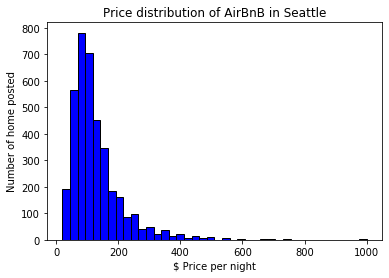

In [115]:
plt.hist(df1['price'], color = 'blue', edgecolor = 'black', bins = int(40))
plt.title('Price distribution of AirBnB in Seattle')
plt.xlabel('$ Price per night')
plt.ylabel('Number of home posted')

In [ ]:
## Data Analysis

In [123]:
df1['price'].value_counts(bins=5,normalize=True)

(19.019, 216.0]    0.888161
(216.0, 412.0]     0.095600
(412.0, 608.0]     0.012572
(608.0, 804.0]     0.002357
(804.0, 1000.0]    0.001310
Name: price, dtype: float64

In [ ]:
# Business Question 2: What factors affect the price of AirBnB?

In [ ]:
## Data Cleaning

In [47]:
numdf1=df1.select_dtypes(exclude=['object']) #Remove the object data

In [48]:
numdf1.count()

id                                3818
scrape_id                         3818
host_id                           3818
host_listings_count               3816
host_total_listings_count         3816
latitude                          3818
longitude                         3818
accommodates                      3818
bathrooms                         3802
bedrooms                          3812
beds                              3817
square_feet                         97
price                             3818
guests_included                   3818
minimum_nights                    3818
maximum_nights                    3818
availability_30                   3818
availability_60                   3818
availability_90                   3818
availability_365                  3818
number_of_reviews                 3818
review_scores_rating              3171
review_scores_accuracy            3160
review_scores_cleanliness         3165
review_scores_checkin             3160
review_scores_communicati

In [51]:
numdf2=numdf1.drop(columns=['id', 'scrape_id', 'host_id', 'square_feet', 'license'])
numdf2=numdf2.dropna()

In [52]:
numdf2.count()

host_listings_count               3140
host_total_listings_count         3140
latitude                          3140
longitude                         3140
accommodates                      3140
bathrooms                         3140
bedrooms                          3140
beds                              3140
price                             3140
guests_included                   3140
minimum_nights                    3140
maximum_nights                    3140
availability_30                   3140
availability_60                   3140
availability_90                   3140
availability_365                  3140
number_of_reviews                 3140
review_scores_rating              3140
review_scores_accuracy            3140
review_scores_cleanliness         3140
review_scores_checkin             3140
review_scores_communication       3140
review_scores_location            3140
review_scores_value               3140
calculated_host_listings_count    3140
reviews_per_month        

In [133]:
numdf2.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,6.864013,6.864013,47.628587,-122.332918,3.388854,1.260032,1.303822,1.745860,127.025159,1.712739,...,26.724204,94.550000,9.636306,9.556688,9.787898,9.813057,9.609873,9.453822,2.989172,2.100924
std,25.460943,25.460943,0.042972,0.031629,1.995711,0.595709,0.877337,1.158538,90.314824,1.312436,...,39.782249,6.596338,0.698759,0.795998,0.592708,0.550497,0.628792,0.749706,5.979407,1.824101
min,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,25.000000,0.000000,...,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,1.000000,1.000000,47.608557,-122.354194,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,...,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.710000
50%,1.000000,1.000000,47.623103,-122.329051,3.000000,1.000000,1.000000,1.000000,100.000000,1.000000,...,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.560000
75%,3.000000,3.000000,47.662208,-122.310460,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,...,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.020000
max,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,15.000000,1000.000000,13.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [ ]:
## Data Visualization

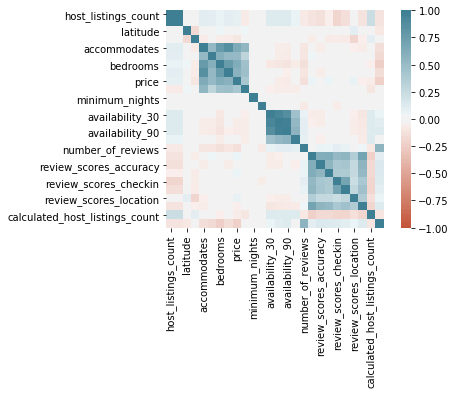

In [57]:
corr = numdf2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
);

In [58]:
objdf1=df1.select_dtypes(include=['object'])

In [60]:
objdf1.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [64]:
print(objdf1.columns)

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [67]:
objdf1['cancellation_policy'].describe()

count       3818
unique         3
top       strict
freq        1417
Name: cancellation_policy, dtype: object

In [ ]:
## Data Visualization and Analysis

Text(0, 0.5, '$ Price per night')

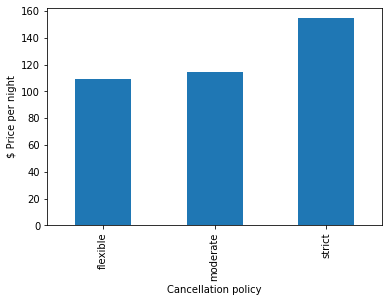

In [136]:
df1.groupby("cancellation_policy")['price'].mean().plot.bar()
plt.xlabel('Cancellation policy')
plt.ylabel('$ Price per night')

Text(0, 0.5, '$ Price per night')

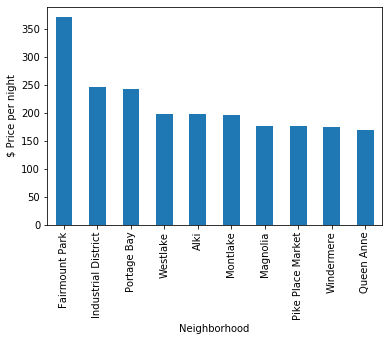

In [135]:
df1.groupby("neighbourhood")['price'].mean().nlargest(10).plot.bar()
plt.xlabel('Neighborhood')
plt.ylabel('$ Price per night')

In [ ]:
# Business Question 3: How to predict the price?

In [ ]:
## Data Modeling

In [83]:
X = numdf2.iloc[:, 5:8].values 
y = numdf2['price'].values

In [137]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [ ]:
### Simple linear regression model

In [138]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)

Slope: [29.86600075 34.0927791  19.09580377]
Intercept: 11.580868035497772


In [140]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_predicted = regressor.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_predicted)
r2_train = r2_score(y_train, y_train_predicted)
print('Root mean squared error of the training set: ', rmse_train)
print('R2 score of the training set: ', r2_train)

Root mean squared error of the training set:  4448.695944123161
R2 score of the training set:  0.45633336855081574


In [141]:
y_test_predicted = regressor.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)
print('Root mean squared error of the testing set: ', rmse_test)
print('R2 score of the testing set: ', r2_test)

Root mean squared error of the testing set:  4731.665071436607
R2 score of the testing set:  0.4155462616225629


In [ ]:
### Random forest model

In [142]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators=20, random_state=42)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [143]:
y_rf_train_predicted = regressor_rf.predict(X_train)
rmse_rf_train = mean_squared_error(y_train, y_rf_train_predicted)
r2_rf_train = r2_score(y_train, y_rf_train_predicted)
print('Root mean squared error of the RF training set: ', rmse_rf_train)
print('R2 score of the RF training set: ', r2_rf_train)

Root mean squared error of the RF training set:  3406.1724442910927
R2 score of the RF training set:  0.5837381735721732


In [144]:
y_rf_test_predicted = regressor_rf.predict(X_test)
rmse_rf_test = mean_squared_error(y_test, y_rf_test_predicted)
r2_rf_test = r2_score(y_test, y_rf_test_predicted)
print('Root mean squared error of the RF testing set: ', rmse_rf_test)
print('R2 score of the RF testing set: ', r2_rf_test)

Root mean squared error of the RF testing set:  4523.8314160104
R2 score of the RF testing set:  0.44121780748234085
